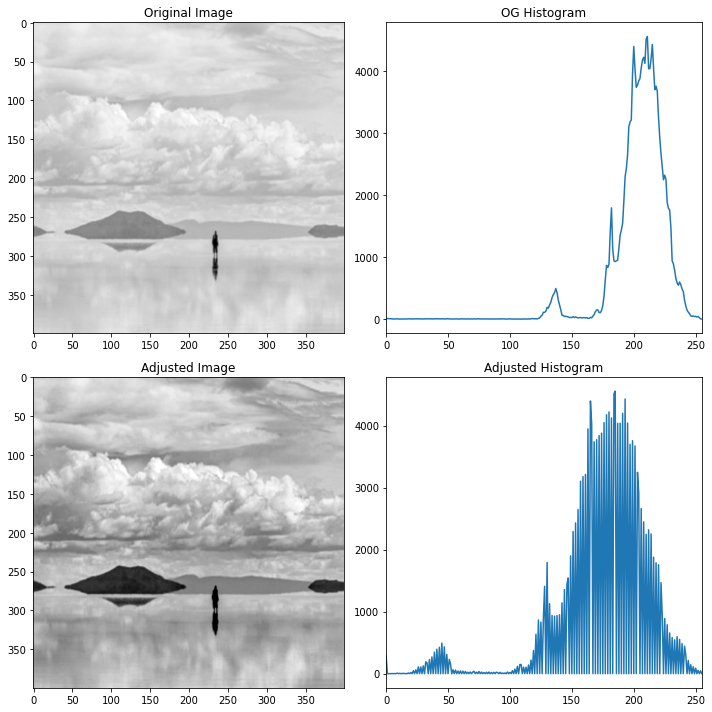

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# The brightness/contrast function from class. You can also use OpenCV's built-in function cv2.convertScaleAbs()
def adjust_brightness_contrast(image_array, alpha, beta):
    # Convert to floating point to avoid overflow and underflow
    temp = image_array.astype('float32')
    
    # Adjust contrast
    temp *= alpha
    
    # Adjust brightness
    temp += beta
    
    # Clip values to be in the range [0, 255]
    temp = np.clip(temp, 0, 255)
    
    return temp.astype('uint8')

#(1) Use the image "lowcontrast.png" on Brightspace and create a histogram from the image data.  Then using either Brightness/Contrast or Gamma Correction stretch the image data to fit the whole tonal range from 0-255.   

# read the image, Put the path to your file.
img = cv2.imread('../Graphics/lowcontrast.png',0)

# calculate the histogram
hist = cv2.calcHist([img],[0],None,[256],[0,255])

# Adjust brightness and contrast.  The values 1.9 and -215 were found by trial and error.  Monitor the histogram.
adjusted_img = adjust_brightness_contrast(img, 1.9, -215) 

# Calculate histogram of adjusted image
adjusted_hist = cv2.calcHist([adjusted_img],[0],None,[256],[0,255]) 

# Plotting original and adjusted images side-by-side
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.plot(hist)
plt.xlim([0,255])
plt.title('OG Histogram')

plt.subplot(2, 2, 3)
plt.imshow(adjusted_img, cmap="gray", vmin=0, vmax=255)
plt.title('Adjusted Image')

plt.subplot(2, 2, 4)
plt.plot(adjusted_hist)
plt.xlim([0,255])
plt.title('Adjusted Histogram')

plt.tight_layout()
plt.show()

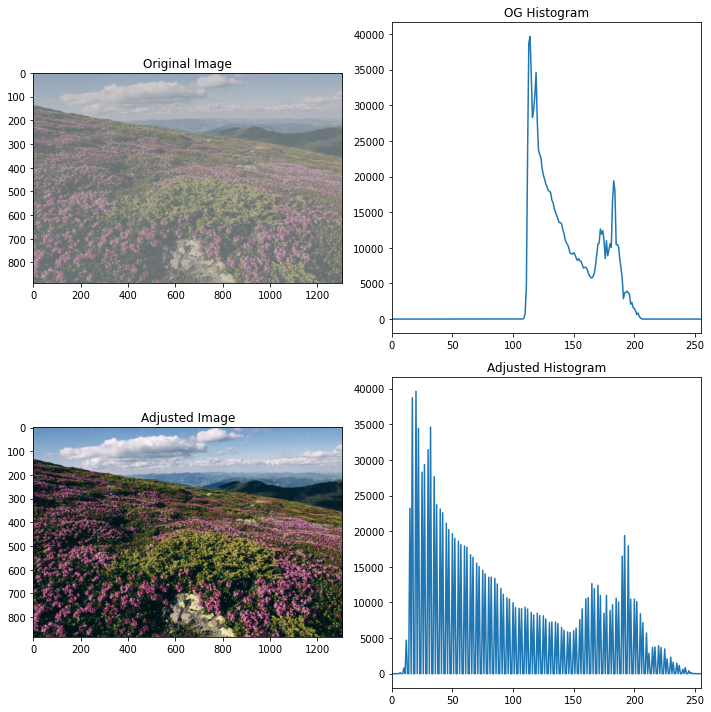

In [51]:
#(2)**  Complete the same exercise with the image "lowcontrast_color.png". 

# read the image, Put the path to your file.
img_color = cv2.imread('../Graphics/lowcontrast_color.png')

# Convert to RGB frm BGR.
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Convert to black and white to calculate the brightness histogram.
img_bw = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Calculate the histogram
hist = cv2.calcHist([img_bw],[0],None,[256],[0,255])

# Adjust brightness and contrast on both the color and bw.  Monitor the black and white histogram.
contrast = 2.5
brightness = -265
adjusted_img_color = adjust_brightness_contrast(img_color, contrast, brightness) 
adjusted_img_bw = adjust_brightness_contrast(img_bw, contrast, brightness)

# Calculate histogram of adjusted image bw
adjusted_hist = cv2.calcHist([adjusted_img_bw],[0],None,[256],[0,255]) 

# Plotting original and adjusted images side-by-side
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.imshow(img_color)
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.plot(hist)
plt.xlim([0,255])
plt.title('OG Histogram')

plt.subplot(2, 2, 3)
plt.imshow(adjusted_img_color, vmin=0, vmax=255)
plt.title('Adjusted Image')

plt.subplot(2, 2, 4)
plt.plot(adjusted_hist)
plt.xlim([0,255])
plt.title('Adjusted Histogram')

plt.tight_layout()
plt.show()
